In [1]:
#Import reqiured libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Read the Dataset.csv into pandas dataframe
df = pd.read_csv("C:/Users/USER/Downloads/Dataset.csv")
df

,OrderID,Date,CustomerID,Product,Quantity,Price,Total
0,1,2024-04-12,C002,Phone,1,600,642.09
1,2,2024-12-14,C003,Laptop,2,1000,2098.39
2,3,2024-09-27,C017,Monitor,1,200,196.34
3,4,2024-04-16,C005,Phone,3,600,1955.86
4,5,2024-03-12,C017,Laptop,1,1000,1098.19
...,...,...,...,...,...,...,...
195,196,2024-04-22,C019,Monitor,1,200,181.37
196,197,2024-11-13,C017,Laptop,1,1000,1066.13
197,198,2024-02-21,C019,Tablet,1,400,387.62
198,199,2024-09-24,C005,Phone,2,600,1265.72


In [3]:
#Checking the shape of the dataframe
df.shape

(200, 7)

In [4]:
# Check for missing values # the Product column has 10 missing values and Total column has 6
df.isnull().sum()

OrderID        0
Date           0
CustomerID     0
Product       10
Quantity       0
Price          0
Total          6
dtype: int64

In [5]:
#check for info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderID     200 non-null    int64  
 1   Date        200 non-null    object 
 2   CustomerID  200 non-null    object 
 3   Product     190 non-null    object 
 4   Quantity    200 non-null    int64  
 5   Price       200 non-null    int64  
 6   Total       194 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 11.1+ KB


In [6]:
#check for mode in Product column
df.Product.mode()

0    Laptop
Name: Product, dtype: object

In [7]:
#check for mode in Total column
df.Total.mode()

0    962.29
Name: Total, dtype: float64

In [8]:
# Let's fill in  the missing values using fillna() method with mode
df['Product'] = df['Product'].fillna(df['Product'].mode()[0])
df['Total']= df['Total'].fillna(df['Total'].mode()[0])

In [9]:
# Rechecking againg for missing values. Nill
df.isnull().sum()

OrderID       0
Date          0
CustomerID    0
Product       0
Quantity      0
Price         0
Total         0
dtype: int64

In [10]:
#Let's calculate the summary statistics across numerical columns
df.select_dtypes('number').describe()

,OrderID,Quantity,Price,Total
count,200.000000,200.00000,200.000000,200.000000
mean,100.500000,1.36500,676.000000,938.378250
std,57.879185,0.61943,300.291316,644.243139
min,1.000000,1.00000,100.000000,93.310000
25%,50.750000,1.00000,400.000000,565.945000
50%,100.500000,1.00000,600.000000,886.410000
75%,150.250000,2.00000,1000.000000,1062.367500
max,200.000000,3.00000,1000.000000,3293.240000


In [11]:
#Group by Product column and aggregate Total column across the five products
product_total = df.groupby('Product')['Total'].sum()
product_total

Product
Headphones      2091.83
Laptop        117515.58
Monitor         4415.36
Phone          46533.65
Tablet         17119.23
Name: Total, dtype: float64

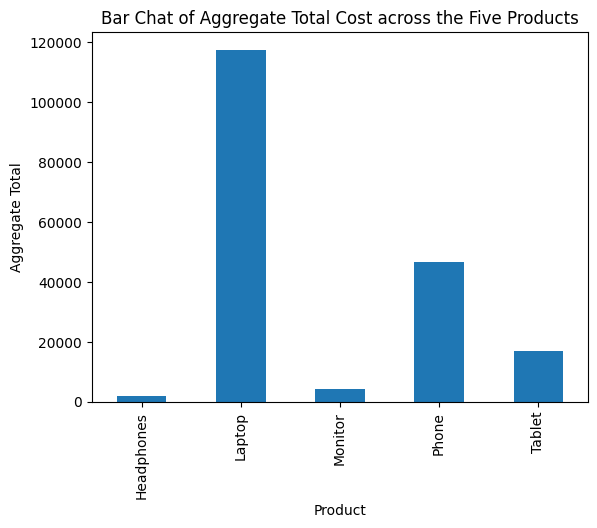

In [12]:
#create bar chart showing aggregate total cost across the five products
#It can be seen that laptop has the highest contribution in terms of 
#aggregate total while headphones is the least contributor
product_total.plot(kind='bar')
plt.ylabel('Aggregate Total')
plt.title('Bar Chat of Aggregate Total Cost across the Five Products')
plt.show()

In [13]:
#Creating  an array
array_list = df.groupby('Product')['Total'].sum().values
array_list 

array([  2091.83, 117515.58,   4415.36,  46533.65,  17119.23])

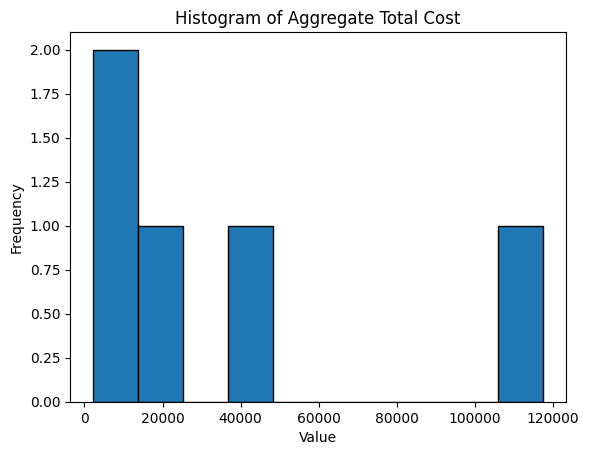

In [14]:
# Create histogram
plt.hist(array_list, bins= 10, edgecolor='black')

# Add titles and labels
plt.title('Histogram of Aggregate Total Cost')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

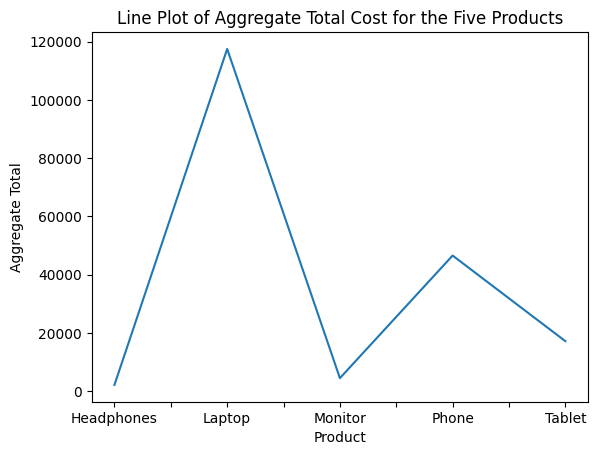

In [15]:
# Creating the line plot of aggregate total versus Product column
df.groupby('Product')['Total'].sum().plot(kind='line')
plt.ylabel('Aggregate Total')
plt.title('Line Plot of Aggregate Total Cost for the Five Products')
plt.show()

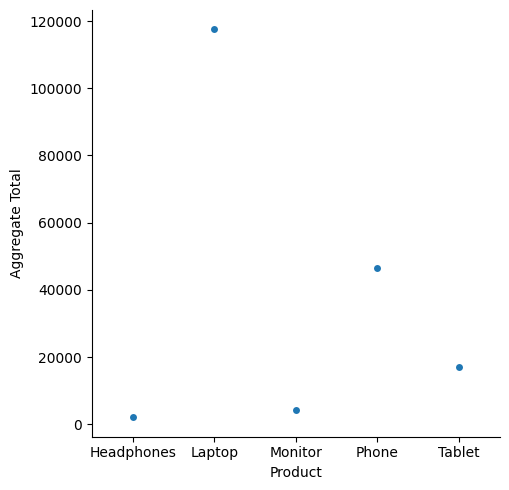

In [16]:
# Creating a categorical plot of Product column and aggregate Total
sns.catplot(product_total, x="Product", y = product_total.values)
plt.ylabel('Aggregate Total')
plt.show()

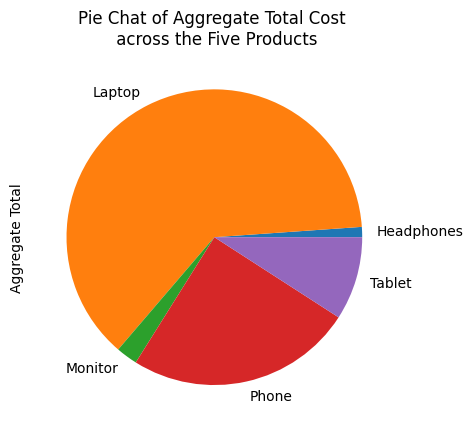

In [17]:
#creating a pie chart of aggregate total cost
df.groupby('Product')['Total'].sum().plot(kind='pie')
plt.ylabel('Aggregate Total')
plt.title('Pie Chat of Aggregate Total Cost \n across the Five Products')
plt.show()

In [18]:
#Group by Product and aggrerate Total and Quantity columns
product_total_qty = df.groupby('Product')[['Total','Quantity']].sum()
product_total_qty

,Total,Quantity
Product,,
Headphones,2091.83,12
Laptop,117515.58,121
Monitor,4415.36,22
Phone,46533.65,76
Tablet,17119.23,42


Text(0.5, 1.0, 'Scatter Plot of Aggregate Quantity vs \n Aggregate Total across the Five Products')

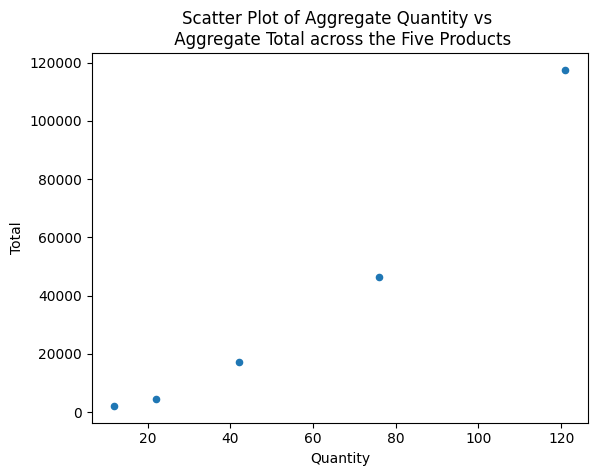

In [19]:
# Strong correlation exists between aggregate total and aggregate quantity across the five products

product_total_qty.plot(kind='scatter',x='Quantity',y='Total')
plt.title('Scatter Plot of Aggregate Quantity vs \n Aggregate Total across the Five Products')

In [62]:
# Creating total_qty df
total_qty = product_total_qty.reset_index(drop=True)
total_qty   

,Total,Quantity
0,2091.83,12
1,117515.58,121
2,4415.36,22
3,46533.65,76
4,17119.23,42


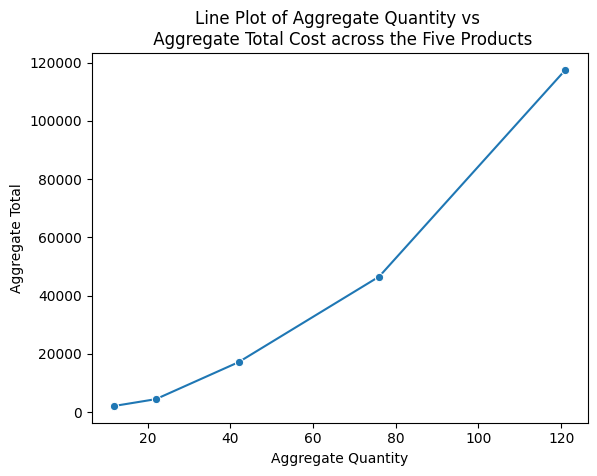

In [21]:
# Creating a line Plot of aggregate quantity vs aggregate total across the five product
sns.lineplot(x='Quantity', y='Total', data=total_qty, marker='o')
plt.xlabel('Aggregate Quantity')
plt.ylabel('Aggregate Total')
plt.title('Line Plot of Aggregate Quantity vs \n Aggregate Total Cost across the Five Products')
plt.grid(False)
plt.show()

In [22]:
# Strong correlation exists between aggregate total and aggregare quantity across the five products

product_total_qty.corr()

,Total,Quantity
Total,1.000000,0.976722
Quantity,0.976722,1.000000


<Axes: >

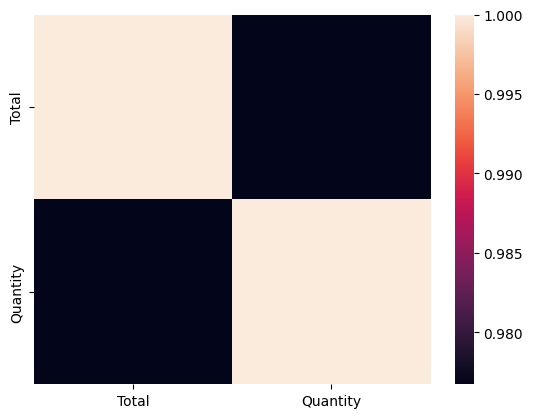

In [23]:
#creating a heatmap
sns.heatmap(df.groupby('Product')[['Total','Quantity']].sum().corr())

In [30]:
# Grouping by product, the Total and Quantity columns
total_qty_df=  df.groupby('Product')[['Total','Quantity']].apply(pd.DataFrame).reset_index().drop('level_1',axis=1)
total_qty_df

,Product,Total,Quantity
0,Headphones,103.66,1
1,Headphones,108.21,1
2,Headphones,93.31,1
3,Headphones,962.29,1
4,Headphones,214.54,2
...,...,...,...
195,Tablet,417.12,1
196,Tablet,402.21,1
197,Tablet,840.52,2
198,Tablet,431.00,1


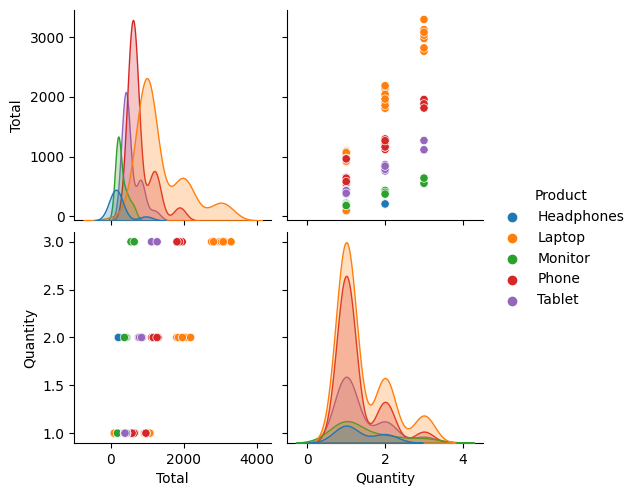

In [31]:
#Creating a pair plot
sns.pairplot(total_qty_df, hue='Product')
plt.show()

In [32]:
#Checking for aggregate quantity purchased by every customer across the five products and aggregate Total Cost
customer_quantity_total = df.groupby(['CustomerID'])[['Quantity','Total']].sum().sort_values(by='Total')
customer_quantity_total

,Quantity,Total
CustomerID,,
C013,8,3662.61
C007,8,4319.41
C010,8,4579.48
C015,7,6562.21
C018,11,6961.08
C011,9,7562.85
C008,15,7933.88
C014,11,7948.12
C012,10,8146.89


In [33]:
#Creating a Series
customer_quantity = customer_quantity_total['Quantity'].sort_values()
customer_quantity

CustomerID
C015     7
C013     8
C007     8
C010     8
C011     9
C012    10
C018    11
C014    11
C009    13
C004    14
C006    14
C008    15
C005    16
C017    16
C020    17
C019    17
C002    17
C016    17
C001    22
C003    23
Name: Quantity, dtype: int64

In [34]:
#creating an array
customer_quantity.values

array([ 7,  8,  8,  8,  9, 10, 11, 11, 13, 14, 14, 15, 16, 16, 17, 17, 17,
       17, 22, 23], dtype=int64)

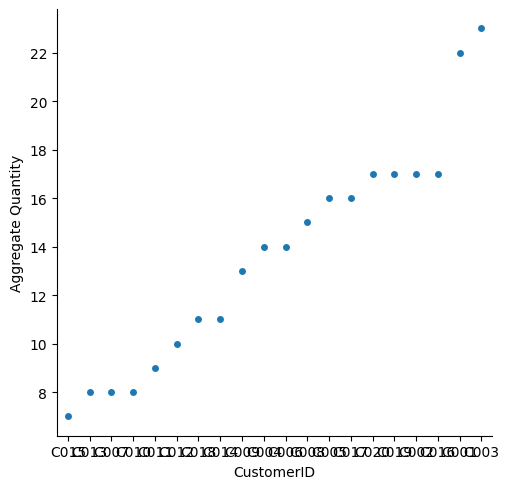

In [35]:
# Creating a categorical plot of aggregate quantity  and CustomerID column
sns.catplot(customer_quantity, x="CustomerID", y = customer_quantity.values)
plt.ylabel('Aggregate Quantity')
plt.show()

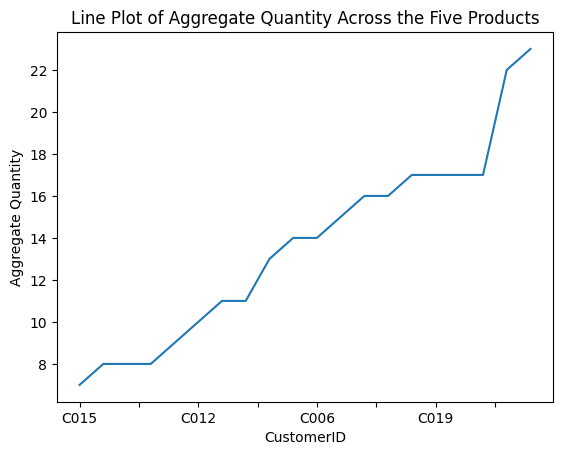

In [36]:
# Creating a line plot of Aggregate Quantity versus CutomerID.It can be seen that C003 is the 
#customer with the highest purchase in terms of aggregate quantity while C015 is the customer with the least

customer_quantity.plot(kind='line')
plt.ylabel('Aggregate Quantity')
plt.title('Line Plot of Aggregate Quantity Across the Five Products')
plt.show()

In [37]:
#Creating a Series
customer_total = customer_quantity_total['Total']
customer_total

CustomerID
C013     3662.61
C007     4319.41
C010     4579.48
C015     6562.21
C018     6961.08
C011     7562.85
C008     7933.88
C014     7948.12
C012     8146.89
C009     9988.65
C020    10040.33
C019    10882.83
C002    11171.62
C004    11459.72
C006    11596.85
C005    11717.83
C017    12091.74
C016    12267.02
C001    13851.85
C003    14930.68
Name: Total, dtype: float64

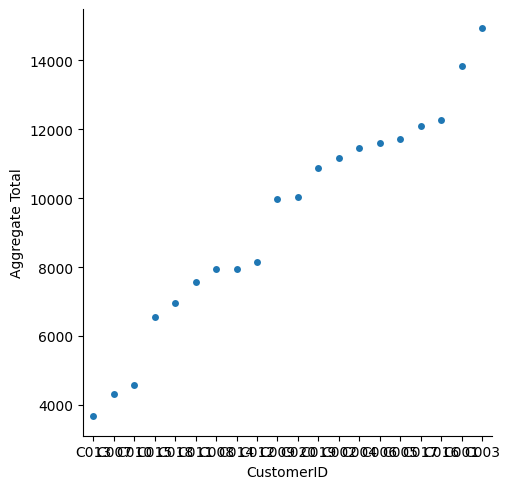

In [38]:
# Creating a categorical plot of aggregate total  and CustomerID column
sns.catplot(customer_total, x="CustomerID", y = customer_total.values)
plt.ylabel('Aggregate Total')
plt.show()

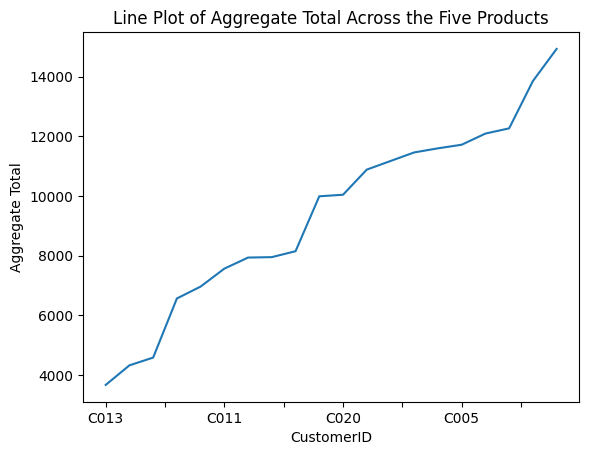

In [39]:
# Creating a line plot of Aggregate Total versus CutomerID.It can be seen that C003 is the 
#customer with the highest contribution in terms of aggregate total while C013 is the customer with the least

customer_total.plot(kind='line')
plt.ylabel('Aggregate Total')
plt.title('Line Plot of Aggregate Total Across the Five Products')
plt.show()

In [57]:
#Grouping by Date and CustomerID columns and aggregate Quantity and Total columns. Dropping CustomerID column
total_qty_df_1  = df.groupby(
    ['Date', 'CustomerID']
)[['Quantity','Total']].sum().sort_values(by = 'Total').reset_index().drop('CustomerID',axis=1)

total_qty_df_1

,Date,Quantity,Total
0,2024-12-10,1,93.31
1,2024-08-30,1,95.45
2,2024-02-13,1,96.85
3,2024-02-02,1,101.74
4,2024-07-10,1,103.66
...,...,...,...
194,2024-10-10,3,3031.03
195,2024-11-13,3,3079.94
196,2024-11-04,3,3080.26
197,2024-06-15,3,3124.19


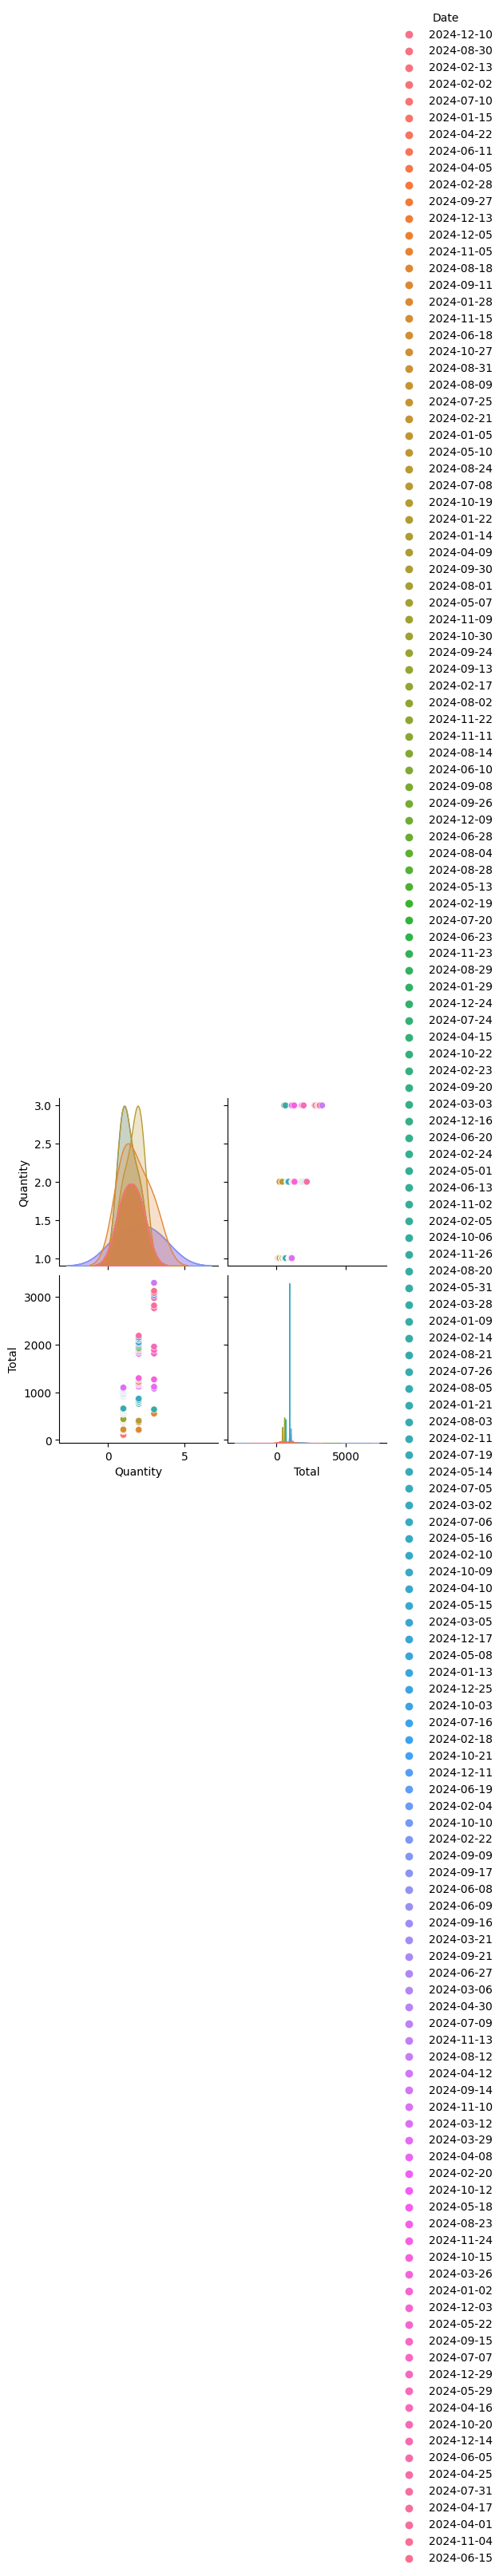

In [58]:
#Creating a pair plot
sns.pairplot(total_qty_df_1, hue='Date')
plt.show()

In [59]:
#Grouping by Date and CustomerID columns and aggregate Quantity and Total columns.Dropping Date column
total_qty_df_2  = df.groupby(
    ['Date', 'CustomerID']
)[['Quantity','Total']].sum().sort_values(by = 'Total').reset_index().drop('Date',axis=1)

total_qty_df_2

,CustomerID,Quantity,Total
0,C020,1,93.31
1,C007,1,95.45
2,C001,1,96.85
3,C005,1,101.74
4,C020,1,103.66
...,...,...,...
194,C014,3,3031.03
195,C004,3,3079.94
196,C011,3,3080.26
197,C001,3,3124.19


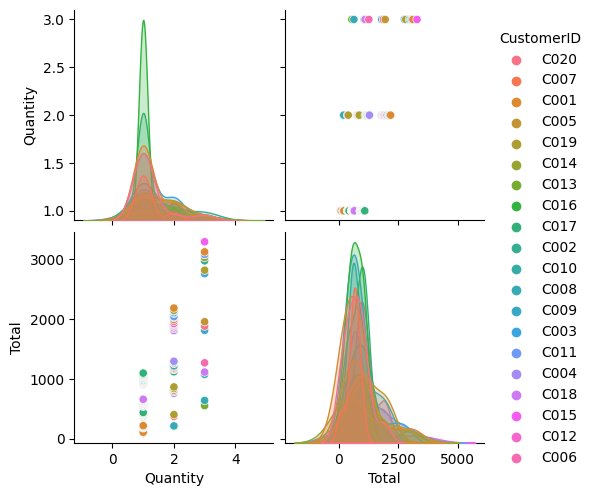

In [60]:
#Creating a pair plot
sns.pairplot(total_qty_df_2, hue='CustomerID')
plt.show()